<a href="https://colab.research.google.com/github/duvetanner/BTC_Project/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 545 Final Project: Using Twitter Data to Predict Bitcoin’s Price

### Group Members: Kevin Zhou, Rohit Jagga, Tanner Duve

# Step 1: Exploratory Data Analysis

## Step 1.0: Download Datasets + Imports

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d mczielinski/bitcoin-historical-data

 94% 94.0M/100M [00:01<00:00, 102MB/s] 
100% 100M/100M [00:01<00:00, 93.8MB/s]


In [ ]:
!kaggle datasets download -d alaix14/bitcoin-tweets-20160101-to-20190329

 99% 1.58G/1.58G [00:18<00:00, 116MB/s]
100% 1.58G/1.58G [00:18<00:00, 92.4MB/s]


In [ ]:
# unzips the archived files
!unzip \*.zip  && rm *.zip# unzips the archived files
!unzip \*.zip  && rm *.zip

Archive:  bitcoin-historical-data.zip
replace bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

Archive:  bitcoin-tweets-20160101-to-20190329.zip
replace tweets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

2 archives were successfully processed.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

## Step 1.1: Loading in Data + Preliminary Processing

In [ ]:
tweets_df = pd.read_csv('tweets.csv', 
                        delimiter = ';', skiprows = 0, lineterminator = '\n' )
historical_df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
tweets_df['timestamp'] = pd.to_datetime(tweets_df['timestamp'])
historical_df['Timestamp'] = [datetime.fromtimestamp(x) for x in historical_df['Timestamp']] 

In [ ]:
tweets_df.dtypes

id                       float64
user                      object
fullname                  object
url                       object
timestamp    datetime64[ns, UTC]
replies                    int64
likes                      int64
retweets                   int64
text\r                    object
dtype: object

In [ ]:
historical_df.dtypes

Timestamp            datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Volume_(BTC)                float64
Volume_(Currency)           float64
Weighted_Price              float64
dtype: object

In [ ]:
tweets_df.head()

,id,user,fullname,url,timestamp,replies,likes,retweets,text\r
0,1.132977e+18,KamdemAbdiel,Abdiel kamdem,NaN,2019-05-27 11:49:14+00:00,0,0,0,È appena uscito un nuovo video! LES CRYPTOMONN...
1,1.132977e+18,bitcointe,Bitcointe,NaN,2019-05-27 11:49:18+00:00,0,0,0,Cardano: Digitize Currencies; EOS https://t.co...
2,1.132977e+18,3eyedbran,Bran - 3 Eyed Raven,NaN,2019-05-27 11:49:06+00:00,0,2,1,Another Test tweet that wasn't caught in the s...
3,1.132977e+18,DetroitCrypto,J. Scardina,NaN,2019-05-27 11:49:22+00:00,0,0,0,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,1.132977e+18,mmursaleen72,Muhammad Mursaleen,NaN,2019-05-27 11:49:23+00:00,0,0,0,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...


In [ ]:
historical_df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tweets_df.describe(include = 'all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,id,user,fullname,url,timestamp,replies,likes,retweets,text\r
count,1.688976e+07,16889764,16889186,3281819,16889765,1.688976e+07,1.688976e+07,1.688976e+07,16889765
unique,NaN,1453311,1330603,3276388,11127706,NaN,NaN,NaN,15221153
top,NaN,ProjectCoin,Project Coin,/AudioCoinBot/status/854099706875699201,2019-06-04 17:41:01+00:00,NaN,NaN,NaN,#QKC #Blockchain #BTC #ETH #blockchaintechnolo...
freq,NaN,146639,146641,2,102,NaN,NaN,NaN,5515
first,NaN,NaN,NaN,NaN,2007-04-19 07:14:38+00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2019-11-23 15:45:57+00:00,NaN,NaN,NaN,NaN
mean,1.105303e+18,NaN,NaN,NaN,NaN,3.139260e-01,2.661873e+00,1.048771e+00,NaN
std,1.481781e+17,NaN,NaN,NaN,NaN,2.317522e+01,1.467740e+02,8.604649e+01,NaN
min,3.286741e+07,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,1.130709e+18,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN


In [ ]:
historical_df.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [ ]:
tweets_df.isnull().sum()

id                  0
user                1
fullname          579
url          13607946
timestamp           0
replies             0
likes               0
retweets            0
text\r              0
dtype: int64

In [ ]:
historical_df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [ ]:
tweets_df.drop(labels = 'url', axis = 1, inplace = True)

In [ ]:
historical_df.dropna(inplace = True)
historical_df.reset_index(drop = True, inplace = True)

In [ ]:
historical_df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


## Step 1.2: Exploring Bitcoin Tweets

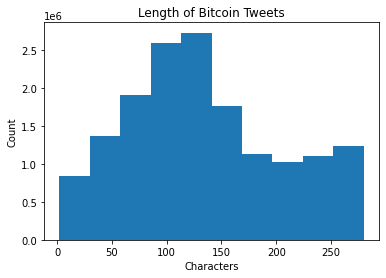

In [ ]:
plt.hist(tweets_df[tweets_df['text\r'].str.len() <= 280]['text\r'].str.len())
plt.title('Length of Bitcoin Tweets')
plt.xlabel('Characters')
plt.ylabel('Count')
plt.show()

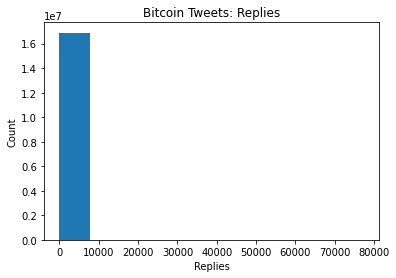

In [ ]:
plt.hist(tweets_df['replies'])
plt.title('Bitcoin Tweets: Replies')
plt.xlabel('Replies')
plt.ylabel('Count')
plt.show()

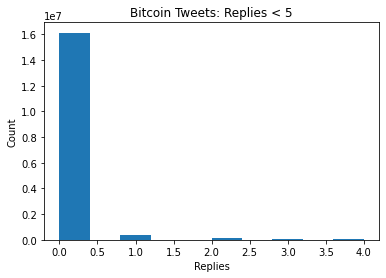

In [ ]:
plt.hist(tweets_df[tweets_df['replies'] < 5]['replies'])
plt.title('Bitcoin Tweets: Replies < 5')
plt.xlabel('Replies')
plt.ylabel('Count')
plt.show()

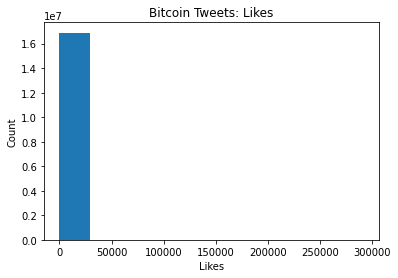

In [ ]:
plt.hist(tweets_df['likes'])
plt.title('Bitcoin Tweets: Likes')
plt.xlabel('Likes')
plt.ylabel('Count')
plt.show()

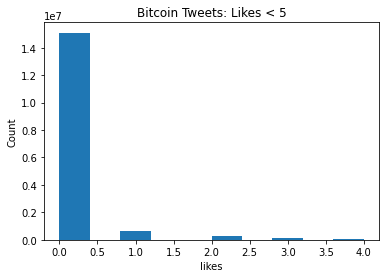

In [ ]:
plt.hist(tweets_df[tweets_df['likes'] < 5]['likes'])
plt.title('Bitcoin Tweets: Likes < 5')
plt.xlabel('likes')
plt.ylabel('Count')
plt.show()

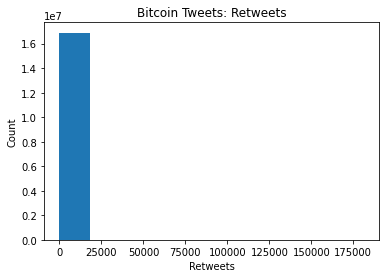

In [ ]:
plt.hist(tweets_df['retweets'])
plt.title('Bitcoin Tweets: Retweets')
plt.xlabel('Retweets')
plt.ylabel('Count')
plt.show()

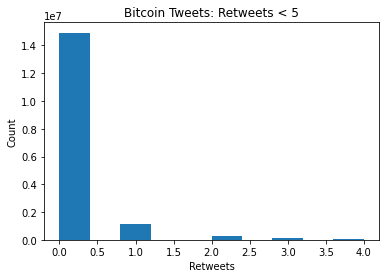

In [ ]:
plt.hist(tweets_df[tweets_df['retweets'] < 5]['retweets'])
plt.title('Bitcoin Tweets: Retweets < 5')
plt.xlabel('Retweets')
plt.ylabel('Count')
plt.show()

## Step 1.3: Exploring Historical Bitcoin Prices

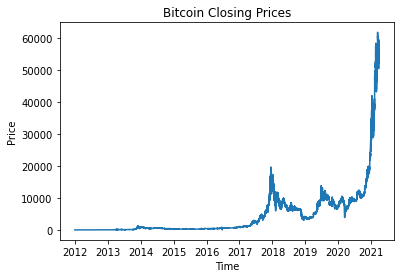

In [ ]:
plt.plot(historical_df['Timestamp'], historical_df['Close'])
plt.title('Bitcoin Closing Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

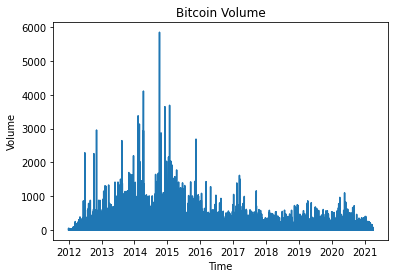

In [ ]:
plt.plot(historical_df['Timestamp'], historical_df['Volume_(BTC)'])
plt.title('Bitcoin Volume')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()

In [ ]:
historical_df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
3613764,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
3613765,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
3613766,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
3613767,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


## Step 1.4: Exploring Tweet Sentiments

In [ ]:
import nltk
import textblob
import re

### Cleaning Tweets

In [ ]:
!pip install whatthelang

     |████████████████████████████████| 788kB 6.0MB/s 
     |████████████████████████████████| 460kB 10.4MB/s 
     |████████████████████████████████| 245kB 17.1MB/s 
  Created wheel for whatthelang: filename=whatthelang-1.0.1-cp37-none-any.whl size=789774 sha256=aab15753566d745e9f750d9cf14652b33d755817c8853ac425d79430f88c8a50
  Stored in directory: /root/.cache/pip/wheels/54/ec/de/379ea04fcc427c46fe3ecd21a5041875fcb41bbd81062abba5
  Created wheel for cysignals: filename=cysignals-1.10.3-cp37-cp37m-linux_x86_64.whl size=706031 sha256=cf5f1ac21e737cffeb25581ebe10dd06fa5ff8a8b05664f0da5c22e55d249127
  Stored in directory: /root/.cache/pip/wheels/1d/de/c9/22c3a5adc6ff0dd19904d4cab0677410e53f4fdd42188ae123
  Created wheel for pyfasttext: filename=pyfasttext-0.4.6-cp37-cp37m-linux_x86_64.whl size=1458698 sha256=610dbde862303297d415a05915b7b1b367069788327694bed6dc873d3aad8157
  Stored in directory: /root/.cache/pip/wheels/25/de/c6/3d26a304c069689a7bf5ef2cc774588663700c8381dbf3d947
Successful

In [ ]:
tweets_sample = tweets_df.sample(frac=0.005, replace=False, random_state=1)

In [ ]:
from whatthelang import WhatTheLang
lang_detector = WhatTheLang()

tweets_sample['lang'] = tweets_sample['text\r'].apply(lambda x: lang_detector.predict_lang(x))
tweets_sample = tweets_sample[tweets_sample['lang'] == 'en'] # removing non-English tweets for our sentiment analysis
tweets_sample

,id,user,fullname,timestamp,replies,likes,retweets,text\r,lang
9127814,1.154495e+18,workwithai,Jobs In AI,2019-07-25 20:54:29+00:00,0,0,0,"Web Design - OSR Recruitment ( Lowestoft, Unit...",en
12826604,1.174088e+18,crypto__mak,Crypto Mak 🌐,2019-09-17 22:28:02+00:00,0,0,1,‘Master’ of Alternative Investments Doesn’t Ha...,en
10064952,1.158807e+18,Maclovin6618,Maclovin,2019-08-06 18:30:09+00:00,0,0,0,@Eljaboom @Ripple @MoneyGram What if the baby ...,en
10311092,1.160107e+18,pemilijan,Polyn Emilijan,2019-08-10 08:31:59+00:00,0,0,0,Buy/Sell altcoin changes with up to 100x Lever...,en
8000220,1.149214e+18,ttcsalam93,ttcsalam,2019-07-11 07:09:49+00:00,0,0,0,#Drife #IEO #Crypto #Blockchain #ethereum #b...,en
...,...,...,...,...,...,...,...,...,...
5978872,1.140142e+18,DigiAdExpert,DA Exp,2019-06-16 06:18:34+00:00,0,0,0,This is the best project I've ever seen on the...,en
663045,1.129280e+18,top_3_coin,Top 3 Coin,2019-05-17 05:00:01+00:00,0,0,0,"Bitcoin (#BTC) price (-0.04): \n$7,273.15 \nRp...",en
478265,1.128551e+18,BitcoinsStar,Arab Investment,2019-05-15 04:42:04+00:00,0,0,0,good project\nVery strong project 💪\n@ABillion...,en
4942526,1.134156e+18,coinspectator,Coin Spectator - Real-time cryptocurrency news,2019-05-30 17:52:56+00:00,0,0,0,Another Aspiring Satoshi Copyrights the Bitcoi...,en


### Sentiment Analysis

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Using Regex to clean out URLs in the tweets and removing hashtags (since many tweets have hashtags).

In [ ]:
def clean_tweet(tweet):
  tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)
  tweet = re.sub(r'((http)\S+)', '', tweet)
  tweet = re.sub(r'\s+', ' ', re.sub('[^A-Za-z]', ' ', tweet.strip().lower())).strip()
  tweet = re.sub(r'\W+', ' ', tweet.strip().lower()).strip()

  return tweet
  #tweet_tokens = nltk.word_tokenize(tweet)
  #tweet_tokens = [token.lower() for token in tweet.split() if token.lower() not in stopwords]
  #return ' '.join(tweet_tokens)

In [ ]:
example_tweet1 = '''
‘Master’ of Alternative Investments Doesn’t Have a Clue About Bitcoin 
https://t.co/rpWkGUuKi1  #BitcoinAnalysis #Cryptocurrency #blackstone 
#CryptocurrencyNews\r'
'''
example_tweet2 = '''
Which one of you bitcoin investors wants to christen my account with this 
interesting coin?\n\n0xb8F3E2542F43d9038B80E12937c893b1DD6fd27F\r
'''

In [ ]:
print(clean_tweet(example_tweet1))

master of alternative investments doesn t have a clue about bitcoin bitcoinanalysis cryptocurrency blackstone cryptocurrencynews


In [ ]:
print(clean_tweet(example_tweet2))

which one of you bitcoin investors wants to christen my account with this interesting coin xb f e f d b e c b dd fd f


In [ ]:
tweets_sample['text\r'] = tweets_sample['text\r'].apply(lambda x: clean_tweet(x))

Next, we'll analyze the sentiment of the tweets using the NLTK and TextBlob toolkits. TextBlob gives us two separate metrics of 'Polarity' and 'Subjectivity', so we'll compare how useful the two approaches are in our modeling.

In [ ]:
def polarity_score(tweet):
  text = textblob.TextBlob(tweet)
  return text.sentiment.polarity
def subjectivity_score(tweet):
  text = textblob.TextBlob(tweet)
  return text.sentiment.subjectivity

In [ ]:
tweets_sample['polarity'] = tweets_sample['text\r'].apply(lambda x: polarity_score(x))
tweets_sample['subjectivity'] = tweets_sample['text\r'].apply(lambda x: subjectivity_score(x))

Let's take a look at the polarity and subjectivity scores of a subset of tweets from our data. Note that polarity ranges from [-1, 1] where -1 denotes a negative sentiment and 1 denotes a positive sentiment. The subjectivity ranges from [0, 1] where a score of 1 denotes extreme subjectivity.

In [ ]:
display(tweets_sample)

,id,user,fullname,timestamp,replies,likes,retweets,text\r,lang,polarity,subjectivity
9127814,1.154495e+18,workwithai,Jobs In AI,2019-07-25 20:54:29+00:00,0,0,0,web design osr recruitment lowestoft united ki...,en,0.500000,0.500000
12826604,1.174088e+18,crypto__mak,Crypto Mak 🌐,2019-09-17 22:28:02+00:00,0,0,1,master of alternative investments doesn t have...,en,0.000000,0.000000
10064952,1.158807e+18,Maclovin6618,Maclovin,2019-08-06 18:30:09+00:00,0,0,0,eljaboom ripple moneygram what if the baby had...,en,0.000000,0.000000
10311092,1.160107e+18,pemilijan,Polyn Emilijan,2019-08-10 08:31:59+00:00,0,0,0,buy sell altcoin changes with up to x leverage...,en,0.042857,0.342857
8000220,1.149214e+18,ttcsalam93,ttcsalam,2019-07-11 07:09:49+00:00,0,0,0,drife ieo crypto blockchain ethereum bitcoin e...,en,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
5978872,1.140142e+18,DigiAdExpert,DA Exp,2019-06-16 06:18:34+00:00,0,0,0,this is the best project i ve ever seen on the...,en,0.577778,0.344444
663045,1.129280e+18,top_3_coin,Top 3 Coin,2019-05-17 05:00:01+00:00,0,0,0,bitcoin btc price rp ethereum eth price rp xrp...,en,0.000000,0.000000
478265,1.128551e+18,BitcoinsStar,Arab Investment,2019-05-15 04:42:04+00:00,0,0,0,good project very strong project abillioncoins...,en,0.631667,0.776667
4942526,1.134156e+18,coinspectator,Coin Spectator - Real-time cryptocurrency news,2019-05-30 17:52:56+00:00,0,0,0,another aspiring satoshi copyrights the bitcoi...,en,0.000000,0.000000


### Visualizing Tweet Sentiment

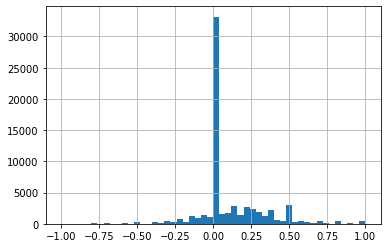

In [ ]:
tweets_sample.polarity.hist(bins=50) 

Besides the large proportion of neutral-polarity tweets, the rest of our tweet data appears to have slightly positive sentiment towards Bitcoin (the average polarity is approximately 0.25).

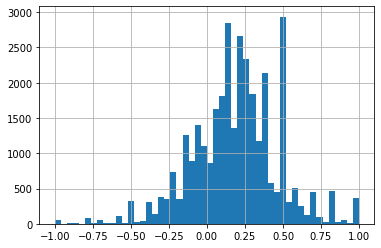

In [ ]:
tweets_sample.polarity.loc[tweets_sample.polarity != 0.0].hist(bins=50) 
# note: our graph excludes the large quantity of neutral-polarity tweets to  
# better show us the distribution of sentiments 

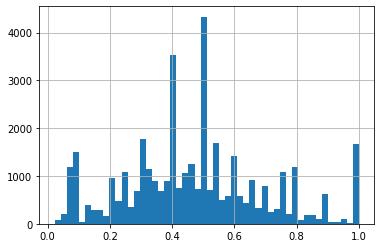

In [ ]:
tweets_sample.subjectivity.loc[tweets_sample.subjectivity != 0.0].hist(bins=50)
# note: our graph excludes the large quantity of zero-subjectivity tweets to  
# better show us the distribution of sentiments 

## Step 1.5: Visualizations of Tweet Sentiment and Bitcoin

For the last step of our Exploratory Data Analysis, let's visualize the how the overall sentiment (both Polarity & Subjectivity) on Bitcoin changes over time, and how the price & volume of Bitcoin changes during that timespan.

In [ ]:
tweets_sample_copy = tweets_sample.copy()
tweets_sample_copy.set_index('timestamp', inplace=True)
tweets_sample_copy = tweets_sample_copy[['polarity','subjectivity']].resample('M').mean()

historical_copy = historical_df[historical_df['Timestamp'] < '2020-01-01 00:00:00']

<Figure size 864x360 with 0 Axes>

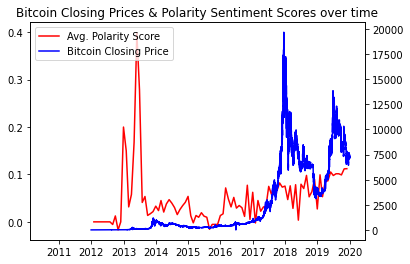

In [ ]:
plt.figure(figsize=(12,5))

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_right.plot(historical_copy['Timestamp'], historical_copy['Close'], color='blue', label='Bitcoin Closing Price')
ax_left.plot(tweets_sample_copy['polarity'], color='red', label='Avg. Polarity Score')

h1, l1 = ax_left.get_legend_handles_labels()
h2, l2 = ax_right.get_legend_handles_labels()
plt.legend(h1+h2, l1+l2, loc=2)
plt.xlabel('Time')
plt.title('Bitcoin Closing Prices & Polarity Sentiment Scores over time')
plt.show()

<Figure size 864x360 with 0 Axes>

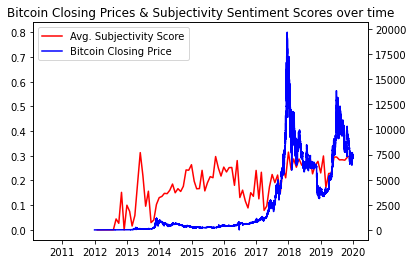

In [ ]:
plt.figure(figsize=(12,5))

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_right.plot(historical_copy['Timestamp'], historical_copy['Close'], color='blue', label='Bitcoin Closing Price')
ax_left.plot(tweets_sample_copy['subjectivity'], color='red', label='Avg. Subjectivity Score')

h1, l1 = ax_left.get_legend_handles_labels()
h2, l2 = ax_right.get_legend_handles_labels()
plt.legend(h1+h2, l1+l2, loc=2)
plt.xlabel('Time')
plt.title('Bitcoin Closing Prices & Subjectivity Sentiment Scores over time')
plt.show()

<Figure size 864x360 with 0 Axes>

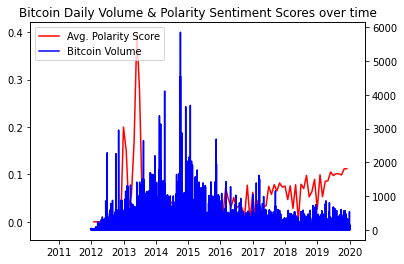

In [ ]:
plt.figure(figsize=(12,5))

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.plot(tweets_sample_copy['polarity'], color='red', label='Avg. Polarity Score')
ax_right.plot(historical_copy['Timestamp'], historical_copy['Volume_(BTC)'], color='blue', label='Bitcoin Volume')

h1, l1 = ax_left.get_legend_handles_labels()
h2, l2 = ax_right.get_legend_handles_labels()
plt.legend(h1+h2, l1+l2, loc=2)
plt.xlabel('Time')
plt.title('Bitcoin Daily Volume & Polarity Sentiment Scores over time')
plt.show()

<Figure size 864x360 with 0 Axes>

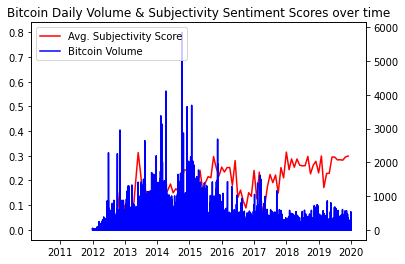

In [ ]:
plt.figure(figsize=(12,5))

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.plot(tweets_sample_copy['subjectivity'], color='red', label='Avg. Subjectivity Score')
ax_right.plot(historical_copy['Timestamp'], historical_copy['Volume_(BTC)'], color='blue', label='Bitcoin Volume')

h1, l1 = ax_left.get_legend_handles_labels()
h2, l2 = ax_right.get_legend_handles_labels()
plt.legend(h1+h2, l1+l2, loc=2)
plt.xlabel('Time')
plt.title('Bitcoin Daily Volume & Subjectivity Sentiment Scores over time')
plt.show()

# Step 2: Data Wrangling

## Step 2.0: Installing Packages

In [ ]:
sc.install_pypi_package('langdetect==1.0.8')
sc.install_pypi_package('nltk')
sc.install_pypi_package('textblob')

## Step 2.1: Importing Data + Preliminary Processing

In [ ]:
from pyspark.sql.types import *

# Schema for bitcoin-tweets.csv
tweets_schema = StructType(
    [StructField('id', FloatType(), True),
     StructField('user', StringType(), True),
     StructField('fullname', StringType(), True),
     StructField('url', StringType(), True),
     StructField('timestamp', TimestampType(), True), 
     StructField('replies', IntegerType(), True),
     StructField('likes', IntegerType(), True),
     StructField('retweets', IntegerType(), True),
     StructField('text', StringType(), True),
    ]
)

# Schema for bitcoin-prices.csv
prices_schema = StructType(
    [StructField('Timestamp', IntegerType(), True),
     StructField('Open', FloatType(), True),
     StructField('High', FloatType(), True),
     StructField('Low', FloatType(), True),
     StructField('Close', FloatType(), True),
     StructField('Volume_(BTC)', FloatType(), True),
     StructField('Volume_(Currency)', FloatType(), True),
     StructField('Weighted_Price', FloatType(), True),
    ]
)

In [ ]:
# Import csv files from S3 bucket as Spark Dataframes
tweets_sdf = spark.read.option('delimiter', ';') \
                       .csv("s3://cis-545-project-bitcoin-files/bitcoin-tweets.csv", 
                            schema = tweets_schema, header = True)
prices_sdf = spark.read.csv("s3://cis-545-project-bitcoin-files/bitcoin-prices.csv", 
                            schema = prices_schema, header = True)

In [ ]:
# Set column names of tweets_sdf, prices_sdf
tweets_cols = ['Id', 'User', 'Fullname', 'Url', 'Timestamp', 'Replies', 
               'Likes', 'Retweets', 'Text']
tweets_sdf = tweets_sdf.toDF(*tweets_cols)

prices_cols = ['Timestamp', 'Open', 'High', 'Low', 'Close',
               'Volume', 'Currency', 'Weighted']
prices_sdf = prices_sdf.toDF(*prices_cols)

In [ ]:
# Drop null rows of tweets_sdf, prices_sdf
tweets_sdf = tweets_sdf.dropna()
prices_sdf = prices_sdf.dropna()

In [ ]:
tweets_sdf.show(5)

In [ ]:
prices_sdf.show(5)

## Step 2.2: Obtaining New Features with UDFs

In [ ]:
from langdetect import detect
from pyspark.sql.functions import udf

# Determine the language of each tweet
def detect_lang(x):
    try:
        return detect(x)
    except:
        return 'fr'        # Catches faulty inputs as non-English

detect_lang_udf = udf(lambda x: detect_lang(x), StringType())
tweets_lang_sdf = tweets_sdf.select('id', 'user', 'fullname', 'timestamp', 
                                    'url', 'replies', 'likes', 'retweets', 'text', 
                                    detect_lang_udf('text').alias('Language'))
tweets_lang_sdf.show(5)

In [ ]:
# Select all tweets in English
tweets_lang_sdf.createOrReplaceTempView("tweets_lang")
tweets_query = '''SELECT Timestamp, Replies, Likes, Retweets, Text
                  FROM tweets_lang WHERE tweets_lang.Language = "en"'''
tweets_lang_sdf = spark.sql(tweets_query)
tweets_lang_sdf.show(5)

In [ ]:
import nltk
import textblob
import re

# List of English stopwords - Import of stopwords not working, so listed here
stopwords =["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", 
            "your", "yours", "yourself", "yourselves", "he", "him", "his", 
            "himself", "she", "her", "hers", "herself", "it", "its", "itself", 
            "they", "them", "their", "theirs", "themselves", "what", "which", 
            "who", "whom", "this", "that", "these", "those", "am", "is", "are", 
            "was", "were", "be", "been", "being", "have", "has", "had", 
            "having", "do", "does", "did", "doing", "a", "an", "the", "and", 
            "but", "if", "or", "because", "as", "until", "while", "of", "at", 
            "by", "for", "with", "about", "against", "between", "into", 
            "through", "during", "before", "after", "above", "below", "to", 
            "from", "up", "down", "in", "out", "on", "off", "over", "under", 
            "again", "further", "then", "once", "here", "there", "when", 
            "where", "why", "how", "all", "any", "both", "each", "few", "more", 
            "most", "other", "some", "such", "no", "nor", "not", "only", "own", 
            "same", "so", "than", "too", "very", "s", "t", "can", "will", 
            "just", "don", "should", "now"]

In [ ]:
# Remove undesirable contents in the tweets
def clean_tweet(tweet):
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)
    tweet = re.sub(r'((http)\S+)', '', tweet)
    tweet = re.sub(r'\s+', ' ', re.sub('[^A-Za-z]', ' ', tweet.strip().lower())).strip()
    tweet = re.sub(r'\W+', ' ', tweet.strip().lower()).strip()
    return tweet

clean_tweet_udf = udf(lambda x: clean_tweet(x), StringType())
tweets_lang_sdf = tweets_lang_sdf.select('Timestamp', 'Replies', 'Likes', 
                                         'Retweets', clean_tweet_udf('Text').alias('Text'))
tweets_lang_sdf.show(5)

In [ ]:
# Determine polarity, subjectivity of the tweets
def polarity_score(tweet):
    text = textblob.TextBlob(tweet)
    return text.sentiment.polarity

def subjectivity_score(tweet):
    text = textblob.TextBlob(tweet)
    return text.sentiment.subjectivity

polarity_udf = udf(lambda x: polarity_score(x), FloatType())
subjectivity_udf = udf(lambda x: subjectivity_score(x), FloatType())

tweets_sentiment_sdf = tweets_lang_sdf.select('Timestamp', 'Replies', 'Likes', 
                                              'Retweets', 'Text', 
                                              polarity_udf('Text').alias('Polarity'), 
                                              subjectivity_udf('Text').alias('Subjectivity'))
tweets_sentiment_sdf.show(5)

In [ ]:
from pyspark.sql.functions import udf
from datetime import datetime

# Convert Timestamp column of prices_sdf to a timestamp type
def convert_datetime(x):
    return datetime.fromtimestamp(x)
datetime_udf = udf(lambda x: convert_datetime(x), TimestampType())
prices_time_sdf = prices_sdf.select(datetime_udf('Timestamp').alias('Timestamp'), 
                                    'Open', 'Close', 'Volume')
prices_time_sdf.show(5)

## Step 2.3: Final Processing + Joining

In [ ]:
# Group, sort prices by dates
prices_time_sdf.createOrReplaceTempView('prices')
prices_query = """SELECT DATE_FORMAT(prices.Timestamp, 'yyyy-MM-dd') AS Date, 
                  SUM(prices.Volume) AS Volume, 
                  LAST(prices.Close) - FIRST(prices.Open) AS Price 
                  FROM prices GROUP BY Date ORDER BY Date ASC
                  """
prices_days_sdf = spark.sql(prices_query)

prices_days_sdf.createOrReplaceTempView('days')
prices_query = """SELECT * FROM days 
                  WHERE Date BETWEEN '2016-01-01' AND '2019-03-29'"""
prices_days_sdf = spark.sql(prices_query)
prices_days_sdf.show(5)

In [ ]:
import pyspark.sql.functions as F
from pyspark.sql.window import Window

# Take difference of Volume between rows
window_sdf = Window.orderBy('Date')
prices_final_sdf = prices_days_sdf.withColumn('Previous', F.lag(
    prices_days_sdf['Volume']).over(window_sdf))
prices_final_sdf = prices_final_sdf.withColumn('Volume_Difference', F.when(F.isnull(
    prices_final_sdf['Volume'] - prices_final_sdf['Previous']), 0).otherwise(
        prices_final_sdf['Volume'] - prices_final_sdf['Previous']))
prices_final_sdf = prices_final_sdf.drop('Volume', 'Previous')
prices_final_sdf = prices_final_sdf.withColumnRenamed('Volume_Difference', 'Volume')
prices_final_sdf.show(5)

In [ ]:
# Sample the tweets dataset
tweets_sample_sdf = tweets_sentiment_sdf.sample(0.10)
tweets_sample_sdf.show(5)

In [ ]:
# Group tweets by dates
tweets_sample_sdf.createOrReplaceTempView("sample")
tweets_query = """SELECT DATE_FORMAT(sample.Timestamp, 'yyyy-MM-dd') AS Date, 
                  MAX(sample.Replies) AS Replies, MAX(sample.Likes) AS Likes, 
                  MAX(sample.Retweets) AS Retweets, AVG(sample.Polarity) AS Polarity, 
                  AVG(sample.Subjectivity) AS Subjectivity
                  FROM sample GROUP BY Date ORDER BY Date ASC
                  """
tweets_final_sdf = spark.sql(tweets_query)
tweets_final_sdf.show(5)

In [ ]:
# Join the two dataframes into final_sdf
final_sdf = tweets_final_sdf.join(prices_final_sdf, 
                tweets_final_sdf.Date == prices_final_sdf.Date, 
                'inner').drop(prices_final_sdf.Date)
final_sdf.show()

# Step 3: Modeling

## Step 3.0: Set-Up

In [ ]:
%%capture
!apt update
!apt install libkrb5-dev
!pip install sparkmagic
%load_ext sparkmagic.magics

In [ ]:
# EMR Cluster Set-Up
%spark add -s my_session -l python -u # Master Public DNS for cluster here

## Step 3.1: PCA for Dimensionality Reduction

In [ ]:
%%spark

# Set the columns that will be features
all_columns = final_sdf.columns
drop_columns = ['Date', 'Price']
feature_columns = [i for i in all_columns if i not in drop_columns]

In [ ]:
%%spark

from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

# Create a feature vector, transform the dataframe
assembler = VectorAssembler(inputCols = feature_columns, outputCol = "features")
pipeline = Pipeline(stages = [assembler])
pipeline_model = pipeline.fit(final_sdf)
transformed_sdf = pipeline_model.transform(final_sdf)
transformed_sdf.show(5)

In [ ]:
%%spark

# Split dataset to train, test
train_sdf, test_sdf = transformed_sdf.randomSplit([0.8, 0.2], seed = 1)

In [ ]:
%%spark

from pyspark.ml.feature import PCA

# Check explained variance of PCA
pca = PCA(k = len(train_sdf.columns), inputCol = 'features', outputCol = 'pcaFeatures')
pca_model = pca.fit(train_sdf)
pca_model.explainedVariance

Note: Visualizations of the explained variance ratio and specific values from the PCA are shown in Step 3.4.

In [ ]:
%%spark

# Perform PCA
pca = PCA(k = 4, inputCol = 'features', outputCol = 'pcaFeatures')
pca_model = pca.fit(train_sdf)
pca_train = pca_model.transform(train_sdf)
pca_test = pca_model.transform(test_sdf)

train_features = pca_train.select('label', 'pcaFeatures')
test_features = pca_test.select('label', 'pcaFeatures')

## Step 3.2: Linear Regression

### Initial Model

In [ ]:
%%spark

from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'pcaFeatures')
lr_model = lr.fit(train_features)

LinearRegressionModel: uid=LinearRegression_9e982e76087d, numFeatures=7


In [ ]:
%%spark

# Measures of training accuracy for Linear Regression
lr_summary = lr_model.summary
print("numIterations: %d" % lr_summary.totalIterations)

#lr_summary.residuals.show()
print("RMSE: %f" % lr_summary.rootMeanSquaredError)
print("r2: %f" % lr_summary.r2)

numIterations: 350
RMSE: 3.921554
r2: 0.613970


In [ ]:
%%spark

from pyspark.ml.evaluation import RegressionEvaluator

# Check Linear Regression model's test accuracy
predictions = lr_model.transform(test_sdf)
lr_model.setPredictionCol('prediction')

lr_evaluator = RegressionEvaluator(predictionCol = 'prediction', metricName = 'rmse')

test_rmse_orig = lr_evaluator.evaluate(predictions)

In [ ]:
print("Test RMSE: %f" % test_rmse_orig)

Test RMSE: 4.112018


### Linear Regression with Regularization

This time, we'll try using different regularization parameters to avoid overfitting in our original Linear Regression model. We'll look at LASSO (L1), Ridge (L2), and elastic net with the different regularization hyperparameters.

In [ ]:
%%spark

lr = LinearRegression().setFeaturesCol('pcaFeatures').setPredictionCol('prediction')

Note that we are testing L1, L2, & elastic net via the paramGrid below. LASSO (L1) is given by elasticNetParam = 1.0, Ridge (L2) is given by elasticNetParam = 0.0, and we tested the Elastic Net by setting elasticNetParam = 0.5.

In [ ]:
%%spark

paramGrid = ParamGridBuilder() \
    .addGrid(lr.maxIter, [500]) \
    .addGrid(lr.regParam, [0.2, 0.1, 0.01]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

lr_evaluator = RegressionEvaluator(predictionCol = 'prediction', metricName = 'rmse')

crossVal = CrossValidator() \
    .setEstimator(lr) \
    .setEvaluator(lr_evaluator) \
    .setEstimatorParamMaps(paramGrid) \
    .setNumFolds(4)
)

In [ ]:
%%spark

cvModel = crossVal.fit(train_sdf)

bestModel = cvModel.bestModel
bestRegParam = bestModel._java_obj.getRegParam()
bestElasticNetParam = bestModel._java_obj.getElasticNetParam()

In [ ]:
print("Best regParam: %f" % bestRegParam)
print("Best elasticNetParam: %f" % bestElasticNetParam)

Best regParam: 0.100000
Best elasticNetParam: 0.500000


In [ ]:
predictions = bestModel.transform(test_sdf)
test_rmse_best = lr_evaluator.evaluate(predictions)
print("Test RMSE: %f" % test_rmse_best)

Test RMSE: 4.031907


As you can see, our search for the Linear Regression's best hyperparameters gave us elasticNetParam = 0.5, so we'll use the Elastic Net (L1 + L2) when comparing our Linear Regression w/ Regularization's results with our other tested models.

## Step 3.3: Random Forest Regression

### Initial Model

In [ ]:
%%spark

from pyspark.ml.regression import RandomForestRegressor

rf = RandomForestRegressor() \
  .setMaxDepth(10) \
  .setNumTrees(20) \
  .setSeed(1)

rf.setFeaturesCol('pcaFeatures')
rf.setPredictionCol('prediction')

rf_model = rf.fit(train_sdf)

RandomForestRegressionModel: uid=RandomForestRegressor_0c2934909ce7, numTrees=20, numFeatures=7


In [ ]:
%%spark

predictions_train = rf_model.transform(train_sdf)
predictions_test = rf_model.transform(test_sdf)

In [ ]:
%%spark

from pyspark.ml.evaluation import RegressionEvaluator
rf_evaluator = RegressionEvaluator(predictionCol = 'prediction', metricName = 'rmse')

# measures of train and test accuracy for our initial random forest regression model
train_rmse_rf = rf_evaluator.evaluate(predictions_train)
test_rmse_rf = rf_evaluator.evaluate(predictions)

In [ ]:
print("Training RMSE: %f" % train_rmse_rf)
print("Test RMSE: %f" % test_rmse_rf)

Training RMSE: 1.874733
Test RMSE: 2.567549


### Hyperparameter Tuning

Now, we'll tune our Random Forest model's two main hyperparameters (numTrees & maxDepth) using the following parameter grid, and Spark's CrossValidator().

In [ ]:
paramGrid = ParamGridBuilder() \
    .addGrid(numTrees, [5, 10, 20, 30, 40, 50]) \
    .addGrid(maxDepth, [5, 10, 15, 20]) \
    .build()

crossVal = CrossValidator() \
    .setEstimator(rf_model) \
    .setEvaluator(rf_evaluator) \
    .setEstimatorParamMaps(paramGrid) \
    .setNumFolds(4)
)

In [ ]:
cvModel = crossVal.fit(train_sdf)
predictions = cvModel.transform(test_sdf)

test_rmse_rf_tuned = rf_evaluator.evaluate(predictions)

In [ ]:
print("Test RMSE after tuning: %f" %test_rmse_rf_tuned)

Test RMSE after tuning: 2.109739


Finally, let's compare how well each of our tested models did in relation to each other, in the section below.

## Step 3.4: Model Visualizations

In [ ]:
# PCA Explained Variance
explained = [0, 0.7323, 0.2198, 0.0386, 0.0066, 0.0019, 0.0008]
fig = px.line(x = np.arange(0, 7), y = np.cumsum(explained), 
              title = 'PCA Explained Variance', labels = {
                  'x': 'Dimension', 
                  'y': 'Ratio'
              })
fig.show()

In [ ]:
# Training vs. Test Accuracy across Models
models = ['LR', 'LR-Reg', 'RF', 'RF-Param']
fig = go.Figure(data = [
    go.Bar(name = 'Training', x = models, y = [0.437893, 0.469102, 0.566799, 0.621909]), 
    go.Bar(name = 'Test', x = models, y = [0.387849, 0.407864, 0.499032, 0.571034])], 
    layout = go.Layout(
        title = go.layout.Title(text = 'Training vs. Test Accuracy Across Models')
    )
)

fig.update_layout(
    xaxis_title = 'Model',
    yaxis_title = 'Accuracy', 
    barmode = 'group')
fig.show()

In [ ]:
# RMSE across Models
fig = px.bar(x = models, y = [4.112018, 4.031907, 2.567549, 2.109739], 
             title = 'Test RMSE Across Models', labels = {
                 'x': 'Model', 
                 'y': 'RMSE'
             }, color = ['red', 'green', 'blue', 'purple'])
fig.layout.update(showlegend = False)
fig.show()